# AIAP Batch 13 Technical Assessment
Task 1 - Exploratory Data Analysis (EDA)
***
Submitted by: &emsp;**Aw Chong Kiang** <br>
Date: &emsp;&emsp;&emsp;&emsp;&ensp;&ensp;**16 Jan 2022**



## Objectives
- Predict the occurrence of car failure using the provided dataset (`failure.db`) for an automotive company to formulate mitigative policies.
- Query dataset from following URL: [https://techassessment.blob.core.windows.net/aiap13-assessment-data/failure.db](https://techassessment.blob.core.windows.net/aiap13-assessment-data/failure.db).
- Evaluate at least 3 suitable models for predicting car failure.

## Steps taken in EDA process
Outline of steps taken in EDA process after data is loaded:
1. Basic Data Exploration
    - Data Structure
    - Data Types
    - Unique Values
    - Other Observations
2. Missing Values
3. Duplicates
4. Errors
5. Outliers
6. Correlation
7. Data Visualization

## Import Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import itertools
from urllib import request
from pathlib import Path
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# scikit-learn libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler

%matplotlib inline

 ## Download Database
 - Create a subfolder "data" to save failure.db if it doesn't exist.
 - Download failure.db via urllib.request to data subfolder.

In [2]:
# Create data subfolder if not exist
data_dir = Path.cwd().joinpath('data')

if data_dir.is_dir():
   print("data subfolder exist.")
else:
    data_dir.mkdir(parents=True, exist_ok=True)

# Create file path to failure.db
file_dir = data_dir.joinpath('failure.db')

# Download failure.db from URL provided to data subfolder
if file_dir.is_file():
    print("failure.db successfully downloaded already.")
else:
    url = "https://techassessment.blob.core.windows.net/aiap13-assessment-data/failure.db"   
    request.urlretrieve(url, file_dir)


data subfolder exist.
failure.db successfully downloaded already.


## Retrieve Records
- Identify number of tables in failure.db database.
- Retrieve all records from all tables.

In [3]:
# Importing Sqlite3 Module
import sqlite3

record = []

try:
    # Connect to failure.db
    conn = sqlite3.connect(file_dir)
    print("Connected to SQLite")

    # Getting all tables from sqlite_master
    query_tables = "SELECT name FROM sqlite_master WHERE type='table';"

    # Creating cursor object using connection object
    cursor = conn.cursor()

    # Determine list of table names by executing query_tables
    cursor.execute(query_tables)
    table_list = cursor.fetchall()
    print(f"List of tables: {table_list}")

    # Retrieve all records from tables
    for table in table_list:
        query = f"SELECT * FROM {table[0]};"
        cursor.execute(query)
        record.append(cursor.fetchall())

except sqlite3.Error as error:
    print("Failed to execute the above query", error)

finally:
    # Close connection once all records are successfully extracted
    if conn:
        conn.close()
        print("sqlite connection is closed.")



Connected to SQLite
List of tables: [('failure',)]
sqlite connection is closed.


## Load Data
- We noted that there is only 1 table (i.e. failure) in `failure.db` dataset.
- Load failure dataset as pandas dataframe.

In [4]:
# Column names as per "List of Attributes" in assessment.pdf
# Set column names to be lowercase and linked by underscore
column_names = [
    'car_id', 'model', 'color', 'temperature', 'rpm',
    'factory', 'usage', 'fuel_consumption', 'membership',
    'failure_a', 'failure_b', 'failure_c', 'failure_d', 'failure_e',
]

# Create DataFrame
df = pd.DataFrame(record[0], columns=column_names)
df

,car_id,model,color,temperature,rpm,factory,usage,fuel_consumption,membership,failure_a,failure_b,failure_c,failure_d,failure_e
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,"Model 5, 2022",Blue,110.3 °C,1551,"Shang Hai, China",Medium,659.7,Normal,0,0,0,0,0
1,3395a182-7e76-4fb3-94ba-5163d8f4e6b0,"Model 3, 2022",Black,110.4 °C,1408,"Shang Hai, China",Medium,705.3,Premium,1,0,0,0,0
2,8c6a8e5b-d869-4665-b739-819c9e4a2070,"Model 3, 2022",Grey,110.3 °C,1498,"Shang Hai, China",Low,670.7,Premium,0,0,0,0,0
3,ff864366-fe5e-409e-9b2f-8fe440d8cc5b,"Model 3, 2022",Black,110.4 °C,1433,"Berlin, Germany",High,630.6,Premium,1,0,0,0,0
4,10484506-1be0-4a86-8dbc-b8b2092b93b2,"Model 3, 2022",White,230.7 °C,1408,"New York, U.S",High,660.9,Normal,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10076,64921ab7-c024-447a-8651-006a7e8a5e64,"Model 5, 2020",White,110.6 °C,1575,"Shang Hai, China",Low,728.5,Premium,0,0,0,0,0
10077,246aa846-094d-441a-814a-ecf64d4e3775,"Model 5, 2020",White,110.6 °C,1750,"Berlin, Germany",Low,698.9,Premium,0,0,0,0,0
10078,0b9c5542-e343-4b7e-a4c9-aad358dbe993,"Model 3, 2019",White,110.6 °C,1529,"Shang Hai, China",Low,651.5,Normal,0,0,0,0,0
10079,fd5ac6de-3afb-4ad8-b4a9-4bc47b34dd08,"Model 3, 2019",Blue,110.6 °C,1523,"Berlin, Germany",High,638.8,Premium,0,0,0,0,0


## Basic Data Exploration

- Identify data structure i.e. number of records and columns.
- Identify data types for features and target columns.
- Determine number of uniques values and its frequency of occurence.

### Data Structure
- Pandas dataframe with 10081 rows and 14 columns.

In [5]:
print(f"Number of rows/records: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows/records: 10081
Number of columns: 14


### Data Types
- Numerical features include temperature, rpm and fuel consumption.
- Categorical features include car id, model, color, factory, usage, membership.
- Target consists of 5 failure columns (Failure A to E).
- Data type for temperature should be float instead of object.

In [6]:
# Data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10081 entries, 0 to 10080
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_id            10081 non-null  object 
 1   model             10081 non-null  object 
 2   color             10081 non-null  object 
 3   temperature       10081 non-null  object 
 4   rpm               10081 non-null  int64  
 5   factory           10081 non-null  object 
 6   usage             10081 non-null  object 
 7   fuel_consumption  10081 non-null  float64
 8   membership        9697 non-null   object 
 9   failure_a         10081 non-null  int64  
 10  failure_b         10081 non-null  int64  
 11  failure_c         10081 non-null  int64  
 12  failure_d         10081 non-null  int64  
 13  failure_e         10081 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [7]:
# Number of columns with similar data types
df.dtypes.value_counts()

object     7
int64      6
float64    1
dtype: int64

In [8]:
# Categorical columns (datatype = object)
categorical_cols = df.columns[df.dtypes == 'object'].tolist()
categorical_cols

['car_id', 'model', 'color', 'temperature', 'factory', 'usage', 'membership']

In [9]:
# Numeric columns (datatype = int64 or float64)
numeric_cols = df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')].tolist()
numeric_cols

['rpm',
 'fuel_consumption',
 'failure_a',
 'failure_b',
 'failure_c',
 'failure_d',
 'failure_e']

### Unique Values
- Duplicated `car_id` observed.
- `model` has 41 unique values, which are excessive for categorical values.
- `temperature` contains fahrenheit and celsius values.
- Negative values for `rpm` noted.
- 3 incorrect entries identified in `factory` i.e. 'Seng Kang, China', 'Newton, China', and 'Bedok, Germany'.
- Null values only present in `membership`.
- Only 2 unique values for all 5 failure types i.e. 0 or 1.

In [10]:
# Number of unique values for categorical columns
df[categorical_cols].apply(lambda x: x.nunique()).sort_values(ascending=False)

car_id         10000
temperature      125
model             41
factory            6
color              5
usage              3
membership         3
dtype: int64

In [11]:
# Number of unique values for numeric columns
df[numeric_cols].apply(lambda x: x.nunique()).sort_values(ascending=False)

fuel_consumption    2198
rpm                 1114
failure_a              2
failure_b              2
failure_c              2
failure_d              2
failure_e              2
dtype: int64

In [12]:
# Value counts for categorical columns
for col in categorical_cols:
    print(col)
    print()
    print(df[col].value_counts())
    print('-'*30)
    print()

car_id

81fc248e-c9d4-432d-ad20-9521d504d129    2
a7b8b1ef-02fa-4a9d-a1c6-87ddde63f7cb    2
874a4763-774d-4c8a-b35a-bc8f74095f92    2
a807181e-9c1b-420b-9151-5b095933df24    2
14e682ab-81fe-4870-b7e7-920455791f87    2
                                       ..
f57e14cb-29eb-495e-a453-0dbd14be4980    1
0c757b90-5ebc-44b6-af05-94733bc81f85    1
a6abfb3b-781a-4080-b3b7-083bc4da49f3    1
688f4ff7-ae69-401c-b568-c11113dd73e1    1
8aa49bd0-e297-4e6d-a031-72ea40325e75    1
Name: car_id, Length: 10000, dtype: int64
------------------------------

model

Model 3, 2016    590
Model 3, 2020    566
Model 3, 2012    564
Model 3, 2021    564
Model 3, 2014    559
Model 3, 2018    546
Model 3, 2019    537
Model 3, 2013    532
Model 3, 2015    529
Model 3, 2017    512
Model 3, 2022    318
Model 5, 2018    316
Model 5, 2020    311
Model 5, 2016    291
Model 5, 2014    291
Model 5, 2012    275
Model 5, 2017    270
Model 5, 2013    265
Model 5, 2015    248
Model 5, 2021    247
Model 5, 2019    245
Model 3,

In [13]:
# Value counts for numeric columns
for col in numeric_cols:
    print(col)
    print()
    print(df[col].value_counts())
    print('-'*30)
    print()

rpm

 1452    48
 1435    42
 1447    41
 1469    41
 1450    41
         ..
 1227     1
 1866     1
-1346     1
-1685     1
-1527     1
Name: rpm, Length: 1114, dtype: int64
------------------------------

fuel_consumption

656.9    18
691.8    17
656.8    17
679.4    17
659.6    16
         ..
847.5     1
726.3     1
705.9     1
763.5     1
834.5     1
Name: fuel_consumption, Length: 2198, dtype: int64
------------------------------

failure_a

0    9822
1     259
Name: failure_a, dtype: int64
------------------------------

failure_b

0    9894
1     187
Name: failure_b, dtype: int64
------------------------------

failure_c

0    9768
1     313
Name: failure_c, dtype: int64
------------------------------

failure_d

0    9834
1     247
Name: failure_d, dtype: int64
------------------------------

failure_e

0    9815
1     266
Name: failure_e, dtype: int64
------------------------------



## Missing Vaues
- We explored records with null values against the `model` column and noticed that the records' model year start from 2018, which is less than 5 years from purchase as of 2022.
- Hence, the missing value should be replaced with 'Normal' membership.
- Imputing null values with 'Normal' will be done via pipeline.

In [14]:
# Identify number of null values
df.isna().sum()

car_id                0
model                 0
color                 0
temperature           0
rpm                   0
factory               0
usage                 0
fuel_consumption      0
membership          384
failure_a             0
failure_b             0
failure_c             0
failure_d             0
failure_e             0
dtype: int64

In [15]:
# Analyse model against model year for null value membership
df_temp = df.loc[df.isna().any(axis=1),['model', 'membership']]
df_temp['year'] = df_temp['model'].str.split(r',\s', 1, expand=True, regex=True)[1]
df_temp['year'] = df_temp['year'].astype('int64')
df_temp.sort_values(by='year', ascending=True)

,model,membership,year
10010,"Model 5, 2018",None,2018
6618,"Model 5, 2018",None,2018
6789,"Model 5, 2018",None,2018
6793,"Model 3, 2018",None,2018
6794,"Model 3, 2018",None,2018
...,...,...,...
2942,"Model 3, 2022",None,2022
1088,"Model 5, 2022",None,2022
8031,"Model 3, 2022",None,2022
4389,"Model 5, 2022",None,2022


In [16]:
# Set all null values to np.nan
df.fillna(np.nan, inplace=True)
df.loc[df.isna().any(axis=1),['model', 'membership']]

,model,membership
18,"Model 7, 2020",NaN
30,"Model 5, 2018",NaN
105,"Model 3, 2019",NaN
163,"Model 5, 2022",NaN
168,"Model 3, 2021",NaN
...,...,...
9934,"Model 3, 2018",NaN
9990,"Model 3, 2022",NaN
9995,"Model 5, 2021",NaN
9996,"Model 7, 2021",NaN


## Duplicates
- Remove 81 duplicated rows.


In [17]:
# Number of rows before removing duplicates
old = df.shape[0]

# Remove duplicates
df1 = df.drop_duplicates()

# Number of rows after removing duplicates
new = df1.shape[0]

print(f"Number of rows before removing duplicates: {old}")
print(f"Number of rows after removing duplicates: {new}")
print(f"Number of duplicated rows removed: {old-new}")

Number of rows before removing duplicates: 10081
Number of rows after removing duplicates: 10000
Number of duplicated rows removed: 81


## Errors
- No duplicated car id discovered after removing duplicated rows.
- Value range for numeric features (i.e. `temperature`, `rpm`, and `fuel_consumption`) are within acceptable range.
- 'None' for `membership` is likely due to members not renewing their 'Normal' membership after 5 years of purchase.
- Each row contains at most 1 failure type. Meaning if car has Failure A, it will not contains Failure B, C, D, and E.

##### <font color='red'>car_id</font>
- Refers to car unique ID.
- We have identified earlier duplicated entries for `car_id`.
- Since there are no more duplicated car_ids after removing duplicated rows and all car_ids are unique (i.e. only 1 occurence), we remove car_id column as it is not useful for prediction.

In [18]:
# Check if there are any car_ids with more than 1 occurence i.e. value_counts() > 1
if (df1['car_id'].value_counts() > 1).any():
    print("There are duplicated car_ids even after removing duplicated rows!")
else:
    print("All car_id are unique after removing duplicated rows!")

All car_id are unique after removing duplicated rows!


In [19]:
# Remove `car_id` column
df1 = df1.drop('car_id', axis=1)
df1

,model,color,temperature,rpm,factory,usage,fuel_consumption,membership,failure_a,failure_b,failure_c,failure_d,failure_e
0,"Model 5, 2022",Blue,110.3 °C,1551,"Shang Hai, China",Medium,659.7,Normal,0,0,0,0,0
1,"Model 3, 2022",Black,110.4 °C,1408,"Shang Hai, China",Medium,705.3,Premium,1,0,0,0,0
2,"Model 3, 2022",Grey,110.3 °C,1498,"Shang Hai, China",Low,670.7,Premium,0,0,0,0,0
3,"Model 3, 2022",Black,110.4 °C,1433,"Berlin, Germany",High,630.6,Premium,1,0,0,0,0
4,"Model 3, 2022",White,230.7 °C,1408,"New York, U.S",High,660.9,Normal,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"Model 5, 2021",Black,110.6 °C,1604,"Shang Hai, China",Medium,684.6,NaN,0,0,0,0,1
9996,"Model 7, 2021",Grey,110.6 °C,1632,"Shang Hai, China",Medium,865.4,NaN,0,1,0,0,0
9997,"Model 5, 2021",White,110.6 °C,1645,"Shang Hai, China",Low,646.2,Premium,0,0,0,0,0
9998,"Model 7, 2021",White,231.1 °F,1408,"New York, U.S",High,837.0,Premium,0,0,0,0,0


##### <font color='red'>color</font>
- Remove color column as it is not likely to cause car failures.

In [20]:
# Remove `color` column
df1.drop('color', axis=1, inplace=True)
df1

,model,temperature,rpm,factory,usage,fuel_consumption,membership,failure_a,failure_b,failure_c,failure_d,failure_e
0,"Model 5, 2022",110.3 °C,1551,"Shang Hai, China",Medium,659.7,Normal,0,0,0,0,0
1,"Model 3, 2022",110.4 °C,1408,"Shang Hai, China",Medium,705.3,Premium,1,0,0,0,0
2,"Model 3, 2022",110.3 °C,1498,"Shang Hai, China",Low,670.7,Premium,0,0,0,0,0
3,"Model 3, 2022",110.4 °C,1433,"Berlin, Germany",High,630.6,Premium,1,0,0,0,0
4,"Model 3, 2022",230.7 °C,1408,"New York, U.S",High,660.9,Normal,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"Model 5, 2021",110.6 °C,1604,"Shang Hai, China",Medium,684.6,NaN,0,0,0,0,1
9996,"Model 7, 2021",110.6 °C,1632,"Shang Hai, China",Medium,865.4,NaN,0,1,0,0,0
9997,"Model 5, 2021",110.6 °C,1645,"Shang Hai, China",Low,646.2,Premium,0,0,0,0,0
9998,"Model 7, 2021",231.1 °F,1408,"New York, U.S",High,837.0,Premium,0,0,0,0,0


##### <font color='red'>temperature</font>
- Represents average 30 days temperature of car engine before failure detected.
- All fahrenheit values converted to celsius.
- Temperature, which range from 110 to 230.7 degree celsius, is within acceptable range.

In [21]:
# Iterate through dataframe to convert fahrenheit to celsius
for row in range(len(df1)):
    # split temperature into value and its measure (i.e. celsius or fahrenheit)
    val, mea = df1.loc[row, 'temperature'].split(' ')
    val = float(val)

    if mea.endswith('C'):
        temp = val
    elif mea.endswith('F'):
        # celsius = (fahrenheit - 32) * 5/9
        temp = round((val - 32) * 5/9, 1)

    # Update temperature
    df1.loc[row, 'temperature'] = temp

# Set data type to float for `temperature`
df1['temperature'] = df1['temperature'].astype('float64')

In [22]:
# Determine range of values for `temperature`
print(f"Values for temperature column range from {df1['temperature'].min()} to {df1['temperature'].max()}")

Values for temperature column range from 110.0 to 230.7


##### <font color='red'>rpm</font>
- Represents average 30 days maximum torque speed at maximum torque before failure detected.
- Absolute value taken for `rpm` and set to float datatype.
- Range of values for `rpm` (i.e. from 1168 to 2886) is within reasonable limits.

In [23]:
# Set absolute value for `rpm`
df1['rpm'] = abs(df1['rpm']).astype('float64')

# Value counts for `rpm`
print(df1['rpm'].value_counts())

# Range of values for `rpm`
print(f"\nValues for rpm range from {df1['rpm'].min()} to {df1['rpm'].max()}")


1452.0    48
1435.0    43
1447.0    42
1429.0    40
1469.0    40
          ..
2197.0     1
2211.0     1
1905.0     1
1893.0     1
2450.0     1
Name: rpm, Length: 941, dtype: int64

Values for rpm range from 1168.0 to 2886.0


##### <font color='red'>factory</font>
- Represents manufacturing origin of car.
- We are unable to validate correct entry for 'Seng Kang, China', 'Newton, China', and 'Bedok, Germany' to be 'Shang Hai, China', 'New York, U.S', and 'Berlin, Germany'.
- 180 records containing incorrect factory values were removed.

In [24]:
# Remove 3 incorrect entries

df2 = df1.loc[~((df1['factory'] == 'Seng Kang, China') | \
    (df1['factory'] == 'Newton, China') | \
    (df1['factory'] == 'Bedok, Germany')),:]

print(f"Number of incorrect entries removed: {df1.shape[0] - df2.shape[0]}")

# Reset index
df2 = df2.reset_index(drop=True)
df2

Number of incorrect entries removed: 180


,model,temperature,rpm,factory,usage,fuel_consumption,membership,failure_a,failure_b,failure_c,failure_d,failure_e
0,"Model 5, 2022",110.3,1551.0,"Shang Hai, China",Medium,659.7,Normal,0,0,0,0,0
1,"Model 3, 2022",110.4,1408.0,"Shang Hai, China",Medium,705.3,Premium,1,0,0,0,0
2,"Model 3, 2022",110.3,1498.0,"Shang Hai, China",Low,670.7,Premium,0,0,0,0,0
3,"Model 3, 2022",110.4,1433.0,"Berlin, Germany",High,630.6,Premium,1,0,0,0,0
4,"Model 3, 2022",230.7,1408.0,"New York, U.S",High,660.9,Normal,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9815,"Model 5, 2021",110.6,1604.0,"Shang Hai, China",Medium,684.6,NaN,0,0,0,0,1
9816,"Model 7, 2021",110.6,1632.0,"Shang Hai, China",Medium,865.4,NaN,0,1,0,0,0
9817,"Model 5, 2021",110.6,1645.0,"Shang Hai, China",Low,646.2,Premium,0,0,0,0,0
9818,"Model 7, 2021",110.6,1408.0,"New York, U.S",High,837.0,Premium,0,0,0,0,0


##### <font color='red'>fuel_consumption</font>
- Represents fuel consumption of car in Litre per kilometer.
- Range of values for `fuel_consumption` (i.e. from 598.5 to 904.8) looks suspicious. 
- Fuel consumption of car is likely in millilitres per kilometer instead of litre per kilometer.

In [25]:
# print min and max values for `fuel_consumption`
print(f"Value for fuel_consumption range from {df2['fuel_consumption'].min()} to {df2['fuel_consumption'].max()}")

Value for fuel_consumption range from 598.5 to 904.8


##### <font color='red'>model</font>
- `model` column splitted into `model_type` and `model_year`.
- `model_type` has 3 unique values (i.e. 3, 5, and 7) as per assessment pdf.
- `model_year` has 14 unique values ranging from 2009 to 2022.
- Cars with model_year before 2012 appears to be much lesser compared to the rest of the years.
- `model_year` should be strongly correlated with failure rate as earlier models are more likely to fail compared to recent models.

In [26]:
# Split `model` into `model_type` and `model_year` columns
df2[['model_type', 'model_year']] = df2['model'].str.split(', ', 1, expand=True)
df2['model_type'] = df2['model_type'].str.split(' ', 1, expand=True)[1]

# Drop initial `model` column
df2.drop('model', axis=1, inplace=True)

# Value counts for `model_type` and `model_year`
print(df2['model_type'].value_counts())
print()
print(df2['model_year'].value_counts())
print(f"\nNumber of unique values for model_year: {df2['model_year'].nunique()}")

3    5879
5    2953
7     988
Name: model_type, dtype: int64

2020    948
2016    946
2018    933
2014    931
2012    906
2021    877
2013    858
2019    852
2017    846
2015    839
2022    534
2011    305
2010     43
2009      2
Name: model_year, dtype: int64

Number of unique values for model_year: 14


##### <font color='red'>failure_a, failure_b, failure_c, failure_d, failure_e</font>
- Since all records have at most 1 type of failure, we can assume that the five failure type columms can be treated as a one hot encoding of failure type.
- In other words, we can convert all 5 failure type columns into a single failure column.
- We noted that there are more non failure cases (about 90%) compared to all failure types combined (about 10%).

In [27]:
# Extract dataframe containing only column names starting with 'failure'
df_f = df2.loc[:, df2.columns.str.startswith('failure')].reset_index(drop=True)

# Check if each row contains more than 1 failure type
if (df_f.sum(axis=1)>1).any():
    print("There are records with more than 1 failure type.")
else:
    print("All records contain at most 1 error.")


All records contain at most 1 error.


In [28]:
# Iterate through dataframe
# Set failure value as column of maximum value
# If none of the failure types are identified, set failure value as 0
failure = [df_f.loc[row,:].idxmax().split('_')[1] if df_f.loc[row, :].sum() != 0 else '0' for row in range(len(df_f))]
df_f['failure'] = failure

# Value counts of various failure types
df_f['failure'].value_counts()

0    8738
c     267
e     232
a     225
d     213
b     145
Name: failure, dtype: int64

In [29]:
# Replace `failure_a`, `failure_b`, `failure_c`, `failure_d`, `failure_e` columns with `failure` column
df2.drop(df2.columns[df2.columns.str.startswith('failure')], axis=1, inplace=True)
df2['failure'] = failure

cat_features = ['model_type', 'model_year', 'factory', 'usage', 'membership']
num_features = ['temperature', 'rpm', 'fuel_consumption']

# Re-index columns by categorical feature, followed by numeric feautures, and end with target label
df2 = df2.reindex(columns=cat_features + num_features + ['failure'])
df2

,model_type,model_year,factory,usage,membership,temperature,rpm,fuel_consumption,failure
0,5,2022,"Shang Hai, China",Medium,Normal,110.3,1551.0,659.7,0
1,3,2022,"Shang Hai, China",Medium,Premium,110.4,1408.0,705.3,a
2,3,2022,"Shang Hai, China",Low,Premium,110.3,1498.0,670.7,0
3,3,2022,"Berlin, Germany",High,Premium,110.4,1433.0,630.6,a
4,3,2022,"New York, U.S",High,Normal,230.7,1408.0,660.9,b
...,...,...,...,...,...,...,...,...,...
9815,5,2021,"Shang Hai, China",Medium,NaN,110.6,1604.0,684.6,e
9816,7,2021,"Shang Hai, China",Medium,NaN,110.6,1632.0,865.4,b
9817,5,2021,"Shang Hai, China",Low,Premium,110.6,1645.0,646.2,0
9818,7,2021,"New York, U.S",High,Premium,110.6,1408.0,837.0,0


## Outliers
- Boxplots of min-max scaled numeric features show significant right skew i.e. large number of outliers near the value 1.
- Barplots of categorical features show imbalance dataset especially for `model_type` and `model_year` i.e. Model type 3 has more counts compared to other types.
- Percentage of non failure increased slightly from 92% to 92.3% after removing duplicates.

In [30]:
# Normalized numeric features by StandardScaler
scale = StandardScaler()
Z = scale.fit_transform(df2[num_features])
Z = pd.DataFrame(Z, columns=num_features)
Z

,temperature,rpm,fuel_consumption
0,-0.603408,0.068581,-0.335105
1,-0.582015,-0.729042,0.446240
2,-0.603408,-0.227041,-0.146623
3,-0.582015,-0.589598,-0.833726
4,25.154015,-0.729042,-0.314543
...,...,...,...
9815,-0.539229,0.364204,0.091550
9816,-0.539229,0.520382,3.189513
9817,-0.539229,0.592893,-0.566424
9818,-0.539229,-0.729042,2.702886


In [31]:
# Identify index for rows that are at or between 3 standard deviations away from mean
Z1 = Z.loc[((Z >= -3).sum(axis=1) == 3) & ((Z <= 3).sum(axis=1) == 3), :]
idx_norm = Z1.index.to_list()

# Extract rows that are at or between 3 standard deviations away from mean
df3 = df2.loc[idx_norm, :].reset_index(drop=True)
df3

,model_type,model_year,factory,usage,membership,temperature,rpm,fuel_consumption,failure
0,5,2022,"Shang Hai, China",Medium,Normal,110.3,1551.0,659.7,0
1,3,2022,"Shang Hai, China",Medium,Premium,110.4,1408.0,705.3,a
2,3,2022,"Shang Hai, China",Low,Premium,110.3,1498.0,670.7,0
3,3,2022,"Berlin, Germany",High,Premium,110.4,1433.0,630.6,a
4,5,2021,"Shang Hai, China",Medium,Premium,110.3,1425.0,691.8,0
...,...,...,...,...,...,...,...,...,...
9237,3,2021,"Berlin, Germany",High,Normal,110.6,1634.0,655.5,0
9238,5,2021,"Shang Hai, China",Medium,NaN,110.6,1604.0,684.6,e
9239,5,2021,"Shang Hai, China",Low,Premium,110.6,1645.0,646.2,0
9240,7,2021,"New York, U.S",High,Premium,110.6,1408.0,837.0,0


In [33]:
# Calculate value counts of `failure` before and after removal of outliers
before = df2['failure'].value_counts(normalize=True).sort_index()
after = df3['failure'].value_counts(normalize=True).sort_index()

# Calculate percentage change after removal of outliers
np_count = pd.concat([before, after], axis=1).to_numpy()
df_count = pd.DataFrame(np_count, columns=['b4_removal', 'after_removal'],
    index=before.index)
df_count.eval("percent_change = (after_removal - b4_removal)/b4_removal * 100")

,b4_removal,after_removal,percent_change
0,0.889817,0.894503,0.526699
a,0.022912,0.022506,-1.774027
b,0.014766,0.014715,-0.341022
c,0.027189,0.027375,0.682684
d,0.021690,0.020558,-5.219385
e,0.023625,0.020342,-13.897574


## Correlation
- Correlation between scaled numeric features i.e. temperature, rpm, fuel_consumption are almost zero.
- Correlation is generally applicable in feature extraction or during prediction (i.e. high correlation between dependent variable and independent target variable).
- In theory, it is advisable to remove highly correlated features before classification  as it will not bring additional information but will increase the algorithm complexity. 

In [34]:
# Identify index for rows that are at or between 3 standard deviations away from mean
Z1 = Z.loc[((Z >= -3).sum(axis=1) == 3) & ((Z <= 3).sum(axis=1) == 3), :]
idx_norm = Z1.index.to_list()

# Extract rows that are at or between 3 standard deviations away from mean
df3 = df2.loc[idx_norm, :].reset_index(drop=True)
df3

,model_type,model_year,factory,usage,membership,temperature,rpm,fuel_consumption,failure
0,5,2022,"Shang Hai, China",Medium,Normal,110.3,1551.0,659.7,0
1,3,2022,"Shang Hai, China",Medium,Premium,110.4,1408.0,705.3,a
2,3,2022,"Shang Hai, China",Low,Premium,110.3,1498.0,670.7,0
3,3,2022,"Berlin, Germany",High,Premium,110.4,1433.0,630.6,a
4,5,2021,"Shang Hai, China",Medium,Premium,110.3,1425.0,691.8,0
...,...,...,...,...,...,...,...,...,...
9237,3,2021,"Berlin, Germany",High,Normal,110.6,1634.0,655.5,0
9238,5,2021,"Shang Hai, China",Medium,NaN,110.6,1604.0,684.6,e
9239,5,2021,"Shang Hai, China",Low,Premium,110.6,1645.0,646.2,0
9240,7,2021,"New York, U.S",High,Premium,110.6,1408.0,837.0,0


In [35]:
# Calculate correlation between scaled numeric features
corr_values = df3[num_features].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values.stack().to_frame().reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()
corr_values

,feature1,feature2,correlation,abs_correlation
0,temperature,rpm,0.016367,0.016367
1,temperature,fuel_consumption,-0.001691,0.001691
2,rpm,fuel_consumption,-0.014016,0.014016


## Data Visualization
- Box plot of numeric features reveals significant positive skew.
- Bar plot of categorical features shows only `usage` category to be relatively balanced i.e. number of records are spread out relatively evenly across usage types.
- Scatterplot of scaled numeric features by failure types doesn't shows any distinct clusters. This may be an issue during classification.
- Similarly, box plots are created for each failure type (0, a, b, c, d, e); and show little differences between each numeric features by failure type.

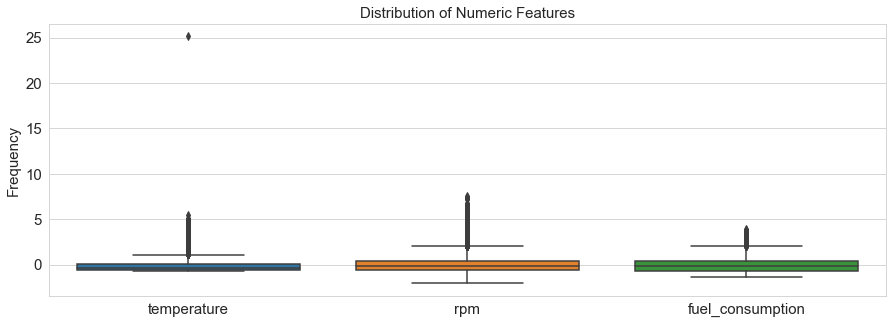

In [36]:
# Visualize distribution of scaled numeric features via boxplot
def plot_numeric(data):
    plt.figure(figsize=(15,5))
    sns.set_style("whitegrid")
    sns.boxplot(data=data)

    plt.title("Distribution of Numeric Features", fontsize=15)
    plt.ylabel("Frequency", fontsize=15)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.show()

plot_numeric(Z)

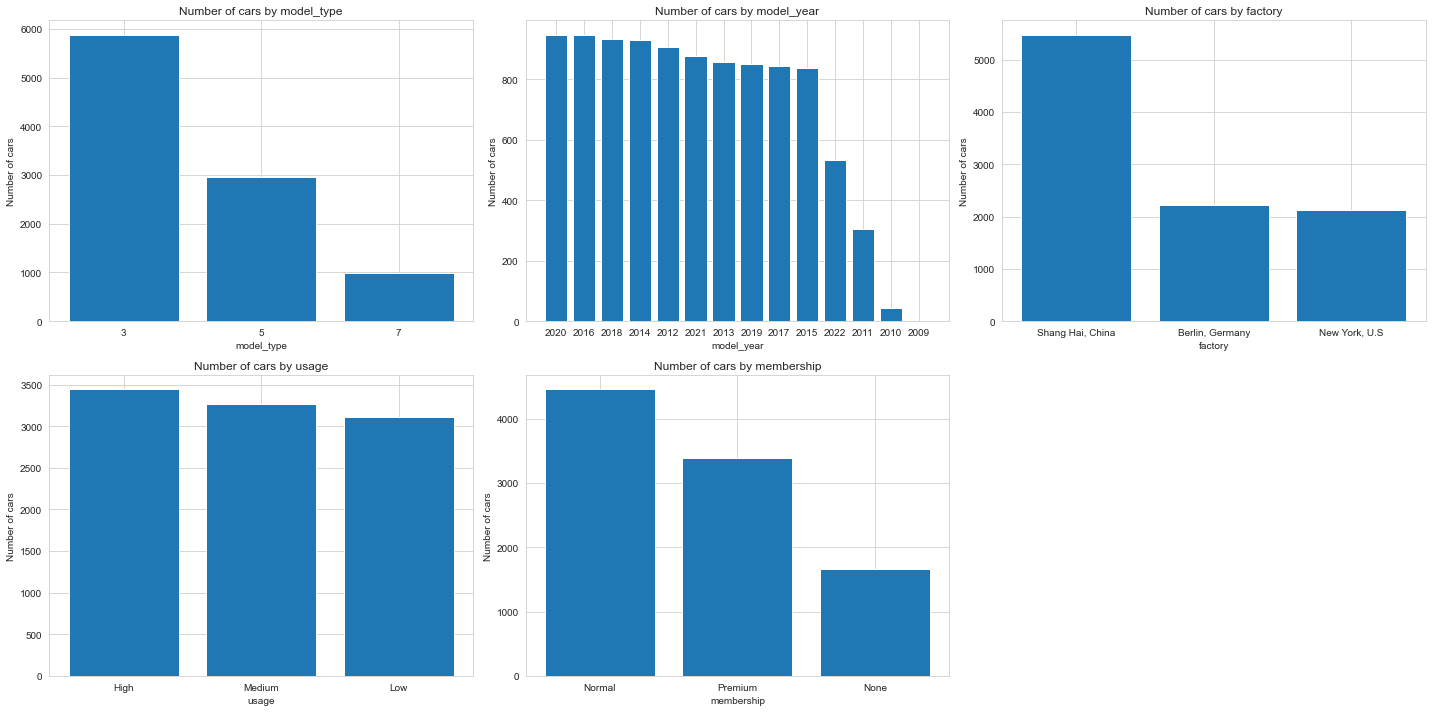

In [37]:
# Visualize distribution of categorical features via bar plot

def plot_categories(data, cols, category='failure'):
    plt.figure(figsize=(20,10))
    pos = 1

    for col in cols:
        plt.subplot(2, 3, pos)
        counts = data[col].value_counts()
        x = counts.index
        y = counts.values
        
        plt.bar(x, y)
        plt.title("Number of cars by " + col) 
        plt.xlabel(col) 
        plt.ylabel("Number of cars")
        pos += 1

    plt.tight_layout()
    plt.show()
    
plot_categories(df2, cat_features)

In [38]:
# Min-Max scaling of numeric features while keeping categorical features intact
scale = MinMaxScaler()
Z2 = scale.fit_transform(df3[num_features])
Z2 = pd.DataFrame(Z2, columns=num_features)

# Concatenate categorical features, numeric features and target column
df4 = pd.concat([df3[cat_features], Z2, df3['failure']], axis=1)
df4

,model_type,model_year,factory,usage,membership,temperature,rpm,fuel_consumption,failure
0,5,2022,"Shang Hai, China",Medium,Normal,0.018182,0.421806,0.239437,0
1,3,2022,"Shang Hai, China",Medium,Premium,0.024242,0.264317,0.417840,a
2,3,2022,"Shang Hai, China",Low,Premium,0.018182,0.363436,0.282473,0
3,3,2022,"Berlin, Germany",High,Premium,0.024242,0.291850,0.125587,a
4,5,2021,"Shang Hai, China",Medium,Premium,0.018182,0.283040,0.365023,0
...,...,...,...,...,...,...,...,...,...
9237,3,2021,"Berlin, Germany",High,Normal,0.036364,0.513216,0.223005,0
9238,5,2021,"Shang Hai, China",Medium,NaN,0.036364,0.480176,0.336854,e
9239,5,2021,"Shang Hai, China",Low,Premium,0.036364,0.525330,0.186620,0
9240,7,2021,"New York, U.S",High,Premium,0.036364,0.264317,0.933099,0


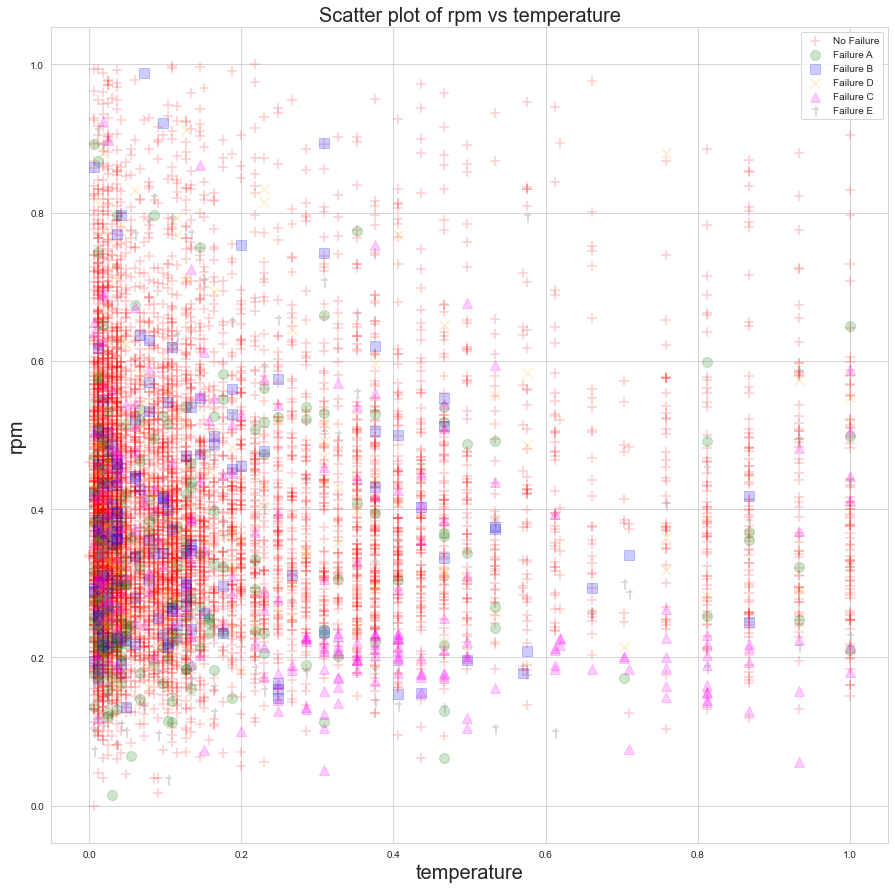

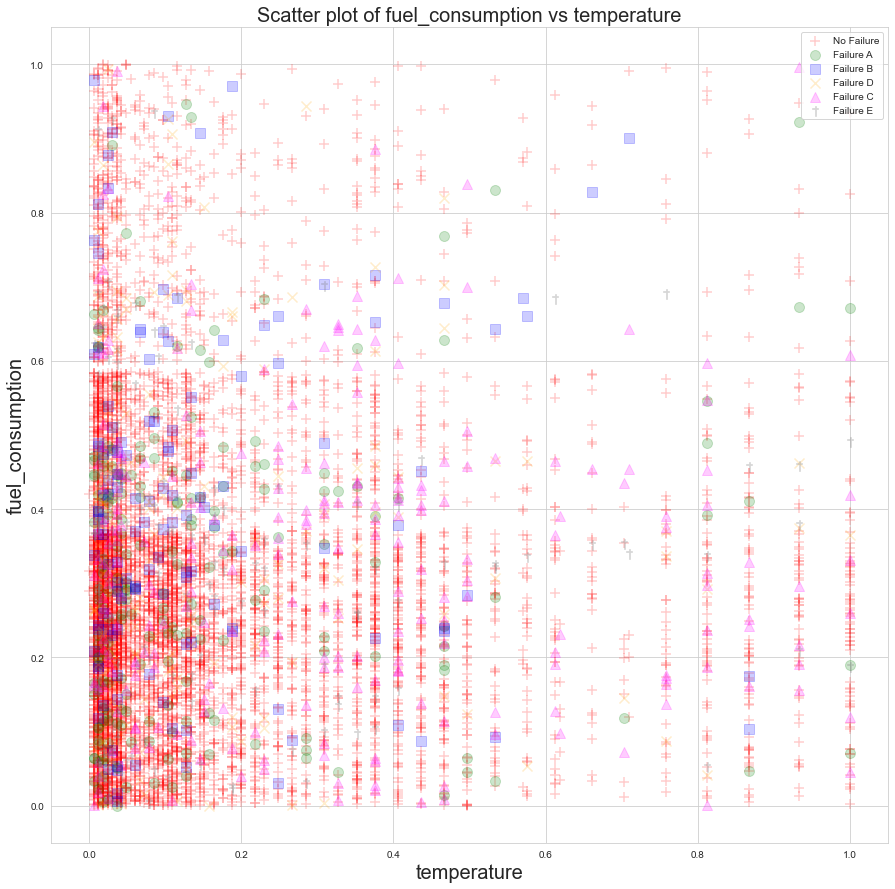

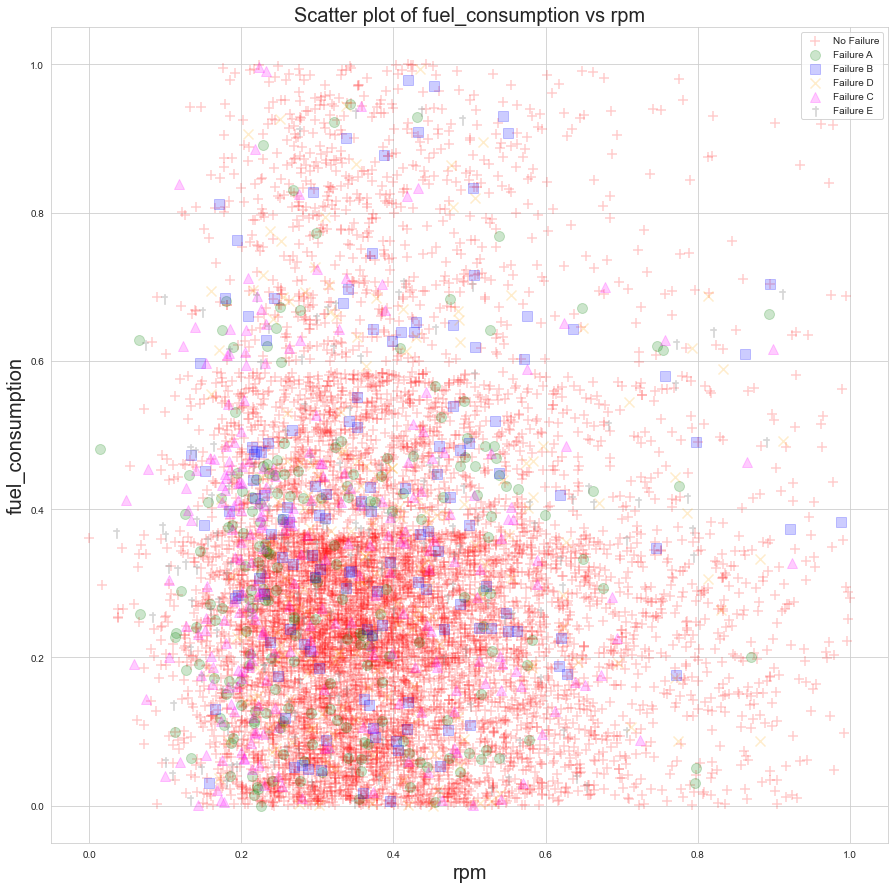

In [39]:
# Scatterplot between numeric features by failure types
def plot_scatter(failure, features, category='failure', alpha=0.2, size=100, font=20):
    # Create combinations of numeric features i.e. 
    # ('temperature, 'rpm'), ('temperature', 'fuel_consumption') and ('rpm', 'fuel_consumption')
    combo = itertools.combinations(features, r=2)

    for col_x, col_y in combo:
        plt.figure(figsize=(15,15))
        sns.set_style("whitegrid")

        unique_failure = failure[category].unique()
        shapes = ['+', 'o', 's', 'x', '^', r"$\dag$"]
        colors = ['red', 'green', 'blue', 'orange', 'magenta', 'gray'] 
        
        for i, fail_type in enumerate(unique_failure):
            dataset = failure.loc[failure[category] == fail_type]
            sns.regplot(x=col_x, y=col_y, data=dataset, marker=shapes[i], color=colors[i],
                    scatter_kws={'alpha':alpha, 's':size}, 
                    label=f"Failure {fail_type.upper()}" if fail_type != '0' else 'No Failure',
                    fit_reg=False)

        plt.title(f"Scatter plot of {col_y} vs {col_x}", fontsize=font)
        plt.xlabel(col_x, fontsize=font)
        plt.ylabel(col_y, fontsize=font)
        plt.legend()
        plt.show()
    
plot_scatter(df4, num_features)

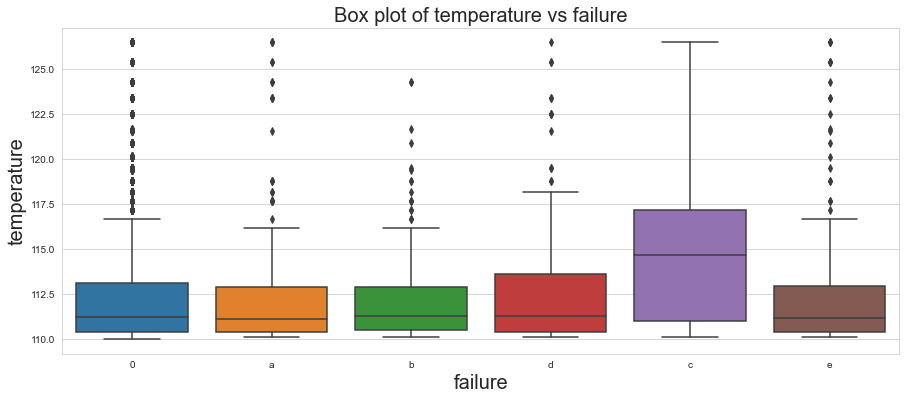

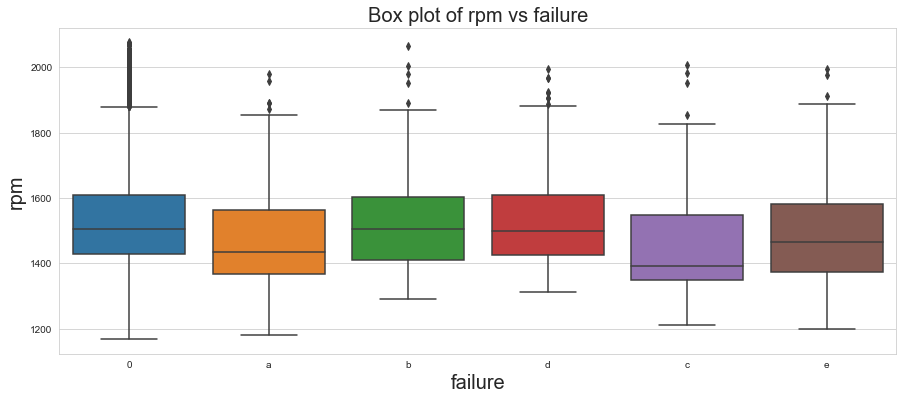

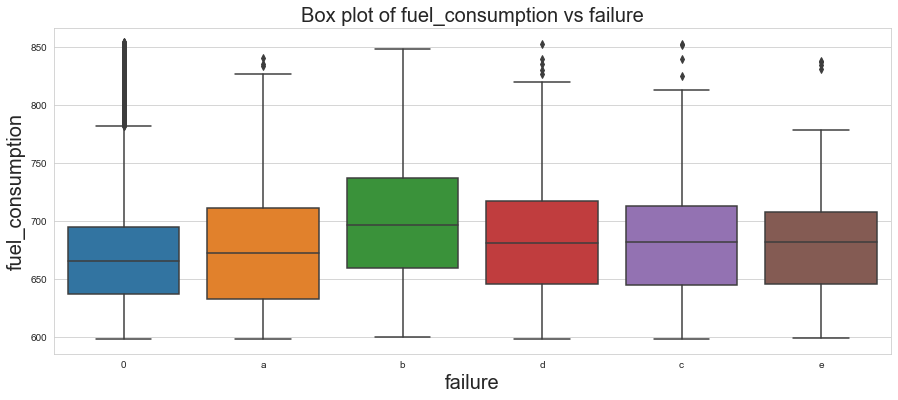

In [40]:
# Boxplot of numeric features by failure category
def plot_box(failure, features, col_x = 'failure', font=20):
    for col_y in features:
        plt.figure(figsize=(15,6))
        sns.set_style("whitegrid")
        sns.boxplot(x = col_x, y = col_y, data=failure)

        plt.title(f"Box plot of {col_y} vs {col_x}", fontsize=font)
        plt.xlabel(col_x, fontsize=font) # Set text for the x axis
        plt.ylabel(col_y, fontsize=font) # Set text for y axis
        plt.show()

plot_box(df3, num_features)

## Conclusion
1. The following pre-processing steps are taken for each column after removing duplicates and outliers (i.e. more than 3 standard deviations).

| Feature | Steps Taken |
| --- | --- |
| Car ID, Color | Drop columns because they are unlikely to affect prediction of car failures. |
| Model | Split column into model_type (i.e. 3, 5, 7) and model_year (2009 to 2022). |
| Temperature | Convert fahrenheit to celscius; and capture only the value (i.e. remove units). |
| RPM | Take absolute value of rpm to remove negative torque speed. |
| Factory | Remove incorrect entries i.e. 'Seng Kang, China', 'Newton, China', 'Bedok, Germany'. |
| Membership | Replace null values with 'Normal'. Note that only `membership` column contains null values. |
| Failure A, Failure B, Failure C, Failure D, Failure E | Combined 5 failure types into a single failure column where 0 = no failure, and 1 = failure. |

2. Categorical features are one-hot encoded while numeric features are min-max scaled.
3. The cleansed dataset is imbalanced (i.e. 92% are non failures while each failure type are about 2% of the entire dataset). As a result, we conclude:
   - There is a high likelihood machine learning algorithms may not performed optimally.
   - Accuracy will likely be artifically inflated due to imbalanced dataset. Hence, F1 Score will be a better gauge of model performance.
4. Both scatterplot and boxplot confirmed that numeric features are uncorrelated. However, scatterplots of numeric features by failure types doesn't show distinct clusters, which could be an issue for classification.

## Our Assumptions
- As the dataset is imbalanced, we assume that the objective is to predict whether any failure occurs rather than the failure type. Hence, the following tasks were performed: 
    - Combined all failure types into a single failure column.
    - Down-sampled non-failure data by 50%.
- `car_id` and `color` does not impact model prediction, and therefore can be removed.
- The portion after the comma in `model` column is assumed to be `model_year` i.e. represents the year of manufacture, and therefore implies year of usage. 
    - Meaning, if `model_year` = 2009, we assume that the car is bought in 2009, and has been used since 2009 till 2022.
- Null value records come solely from `membership`; and consist of model years from 2018 onwards. We assume that the cars were purchased from 2018 onwards and therefore qualified automatically for 'Normal' membership (i.e. less than 5 years of purchase as of 2022). Hence, we replace all null values with 'Normal'.
- `rpm` should be a positive number, and therefore we take the absolute values of `rpm`.
- `fuel_consumption` represents mililitres per kilometer rather than litres per kilometer.
- All values for `temperature`, `rpm`, and `fuel_consumption` are within acceptable range.